In [1]:
#https://www.kaggle.com/mlg-ulb/creditcardfraud
import numpy as np
import scipy as sp
import pandas as pd
import sklearn
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
import sklearn.cross_validation
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\User\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


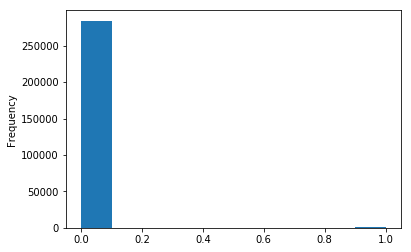

In [6]:
df.Class.plot.hist()

In [7]:
df.shape

(284807, 31)

In [8]:
permissing = (df.isnull().sum() / len(df)) * 100
nadata = permissing.drop(permissing[permissing == 0].index).sort_values(ascending=False)[:30]
nullvalues = pd.DataFrame({'Missing Ratio' :nadata})
print(nullvalues)

Empty DataFrame
Columns: [Missing Ratio]
Index: []


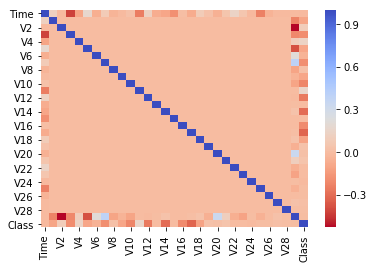

In [21]:
correlation = df.corr()
sns.heatmap(correlation, cmap='coolwarm_r', annot_kws={'size':30})

In [22]:
features = df.iloc[:,1:29].columns

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.cross_validation import train_test_split
from sklearn import linear_model, decomposition, datasets 
import sklearn.decomposition as skdc
import sklearn.pipeline as skpl
pca = skdc.PCA()



X = df[features]
y = df["Class"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,train_size= 0.8)

logistic = linear_model.LogisticRegression()
n_components = [10,20, 40, 46]

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])
n_components = [5, 10, 15, 20]
Cs = np.logspace(-4, 4, 3)
estimator = GridSearchCV(pipe,
                         dict(pca__n_components=n_components, logistic__C=Cs))
estimator.fit(Xtrain, ytrain)

print (estimator.best_estimator_.named_steps['pca'].n_components)

20


In [118]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc

y_pred_proba = estimator.predict_proba(Xtest)
n_threshold = np.linspace(.0005,.005, 10)

for n in n_threshold:
    y_pred_sepal =[]
    for i,k in y_pred_proba:
        if k>n:
            y_pred_sepal.append(1)
        else:
            y_pred_sepal.append(0)
    print (n)
    accuracy = accuracy_score(ytest, y_pred_sepal)
    recall = recall_score(ytest, y_pred_sepal)
    precision = precision_score(ytest, y_pred_sepal)
    f1 = f1_score(ytest, y_pred_sepal)
    print(accuracy, recall, precision)

0.0005
0.7603138934728415 0.9473684210526315 0.006551171931867812
0.001
0.9109055159580071 0.9157894736842105 0.016880093131548313
0.0015
0.9512833116814718 0.8736842105263158 0.02916373858046381
0.002
0.9711562094027597 0.8736842105263158 0.048424737456242706
0.0025
0.9799691022084899 0.8526315789473684 0.06705298013245033
0.003
0.9846915487517994 0.8526315789473684 0.08626198083067092
0.0035
0.9879919946631087 0.8526315789473684 0.10785619174434088
0.004
0.9899582177592079 0.8421052631578947 0.12558869701726844
0.0045000000000000005
0.99127488501106 0.8421052631578947 0.1423487544483986
0.005
0.9920122186720972 0.8421052631578947 0.15384615384615385


In [86]:
y_pred_sepal = estimator.predict(Xtest)

accuracy = accuracy_score(ytest, y_pred_sepal)
recall = recall_score(ytest, y_pred_sepal)
precision = precision_score(ytest, y_pred_sepal)
f1 = f1_score(ytest, y_pred_sepal)
print(accuracy, recall, precision, f1)
confusion_matrix(ytest, y_pred_sepal)

fpr, tpr, thresholds =roc_curve(pd.DataFrame(ytest), pd.DataFrame(y_pred_sepal))
roc_auc = auc(fpr, tpr)
print("Area under the ROC curve : %f" % roc_auc)
print(thresholds)

0.9991222218320986 0.5894736842105263 0.835820895522388 0.691358024691358
Area under the ROC curve : 0.794640
[2 1 0]


In [94]:
print(pd.DataFrame(y_pred_sepal).head())

   0
0  0
1  0
2  0
3  0
4  0


In [119]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.cross_validation import train_test_split
from sklearn import linear_model, decomposition, datasets 
import sklearn.decomposition as skdc
import sklearn.pipeline as skpl
pca = skdc.PCA()



X = df[features]
y = df["Class"]
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,train_size= 0.8)

forest = RandomForestClassifier()
n_components = [10,20, 40, 46]

pca = decomposition.PCA()
pipe = Pipeline(steps=[('pca', pca), ('forest', forest)])
n_components = [5, 10, 15, 20]
rf_param_grid = [{"max_depth": [None],
              "max_features": [1, 3, 10],
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}]
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components))
estimator.fit(Xtrain, ytrain)

print (estimator.best_estimator_.named_steps['pca'].n_components)


20


In [121]:
y_pred_sepal = estimator.predict(Xtest)
accuracy = accuracy_score(ytest, y_pred_sepal)
recall = recall_score(ytest, y_pred_sepal)
precision = precision_score(ytest, y_pred_sepal)
f1 = f1_score(ytest, y_pred_sepal)
print(accuracy, recall, precision)

0.9995611109160493 0.794392523364486 0.9659090909090909
